# Подробное описание всех ликов и идей

1. Данные нам датасеты отсортированы в очень необычном формате, что даёт несколько ликов: <br>
1 - Faculty – в трейне он просто идёт по возрастанию, а вот в тесте можно сказать двумя горбами: <br>
Это даёт понять, что тест возможно повторяет трейн дважды, чем можно воспользоваться. <br>
2 -	Если разбить train на группы в порядке поданных данных и посчитать по ним средний accepted, мы получим интересную закономерность: <br>
Это даёт понять что классификация распределена не случайно и это опять же можно использовать <br>
3 -	Объединив эти два лика можно подставить зависимость от порядка из лика 2 в тест, повторив дважды (это я придумал из лика 1) <br>
Разбивал я если что на 96 групп, а сам метод наложения на тест можно посмотреть далее.

2. В датасете также есть повторяющиеся по 2, 3 или 4 раза student id, причём если взять выборку только из таких данных, то получится, что 0 и 1 распределено поравну, по 15000 (половина от 1 из всего датасета) поэтому я добавил маркер, обозначающий, что student id повторяется. Потом это используется в обучении модели

3. Если сгруппировать данные по стране, возрасту и sociodemographics, то для каждой страны и возраста будет 2 sociodemographics, где у одного будет средний accepted больше, чем у другого, это также можно использовать для обучения модели

### В итоге 2 и 3 лики я использовал для обучения catboost, а 1 для блендинга с его предсказаниями

## Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

## Скачиваем данные

### Колонка personal_statement полностью пустая

In [2]:
train = pd.read_csv(r'/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/train.csv').drop(columns=['personal_statement'])
test = pd.read_csv(r'/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/test.csv').drop(columns=['personal_statement'])
sab = pd.read_csv(r'/kaggle/input/ioai-2025-preparation-class-lesson-1-homework/sample_submission.csv')

In [3]:
train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0
...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0


## Изучим колонки как говориться one by one

### Age

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


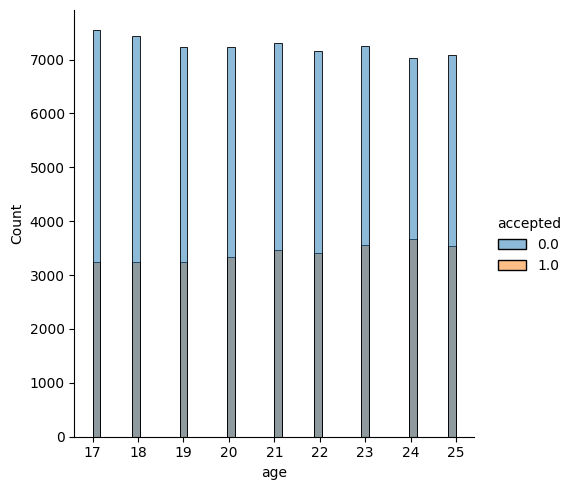

In [4]:
sns.displot(data=train, x='age', hue='accepted')

### Ну, на первый взгляд ничего стоящего

### Country

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


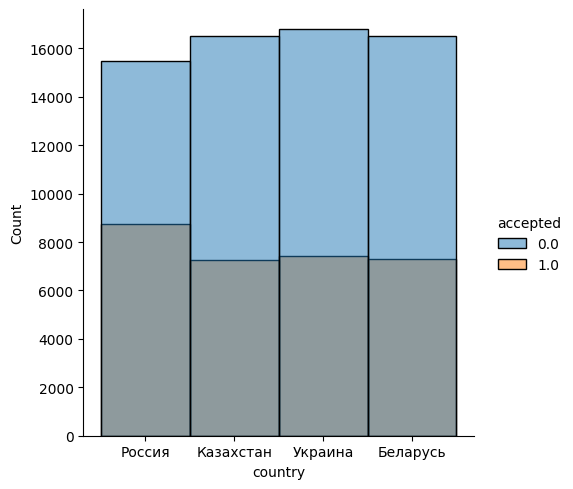

In [5]:
sns.displot(data=train, x='country', hue='accepted')

### В России больше 1, чем в других странах, возможно поможет

### City

In [6]:
train['city'].value_counts()

city
Гомель              4007
Могилёв             3980
Гродно              3978
Брест               3972
Витебск             3965
Минск               3923
Харьков             3618
Днепр               3490
Одесса              3467
Киев                3466
Алматы              3452
Шымкент             3440
Астана              3424
Актобе              3420
Кривой Рог          3408
Львов               3398
Павлодар            3391
Актау               3373
Запорожье           3371
Караганда           3268
Оренбург             670
Ростов-на-Дону       663
Тольятти             649
Красноярск           648
Краснодар            645
Тюмень               644
Пенза                626
Барнаул              624
Ульяновск            621
Пермь                620
Томск                620
Киров                619
Ижевск               617
Челябинск            615
Новокузнецк          613
Ярославль            612
Липецк               609
Кемерово             609
Саратов              607
Екатеринбург        

### Много городов, но опять же ни о чём

### School

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


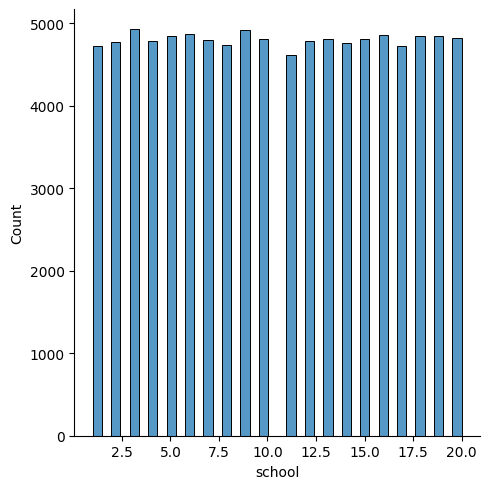

In [7]:
sns.displot(train['school'])

### Начинает складываться ощущение, что вообще ничего по графикам не увидеть)

### Faculty

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


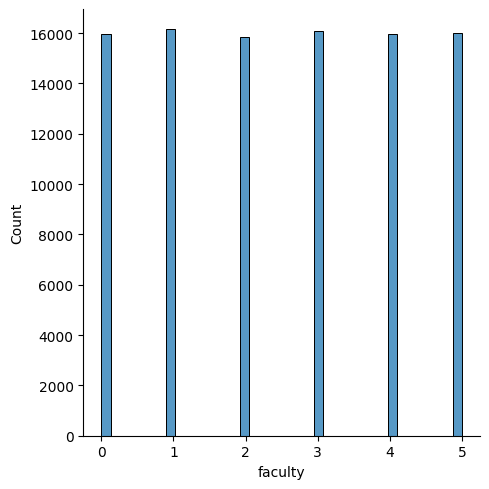

In [8]:
sns.displot(train['faculty'])

### Student_id

### Интересно посмотреть на пересечение

In [9]:
train[train['student_id'].isin(test['student_id'])]

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
397,20,Украина,Львов,14,0,6709935,bc9aafd289de250b9fd6f19c94ab077c,2.0,8667dfa857195bb531b9a6516a618ff6,0.0
845,19,Украина,Львов,8,0,6142223,185ff2a5e1230ddb0434975524432a6c,17.0,093184d004a145a76e96cf50339f4d99,0.0
947,18,Казахстан,Шымкент,1,0,2816090,de6753fb488b87117296d8bef2edc7b3,83.0,7d8e0c79593487a8b220b17b658a14d4,1.0
1225,19,Беларусь,Брест,10,0,4798253,ff43c402b75de2419d4bdf4b96ea6c40,30.0,0140153b35bb555fc26c561f914ac312,1.0
1427,17,Украина,Запорожье,12,0,5998016,f1eef626c29a481a5527d242ae5516a8,95.0,7d77a911b487634b8682d88f0be3142d,0.0
...,...,...,...,...,...,...,...,...,...,...
94601,23,Казахстан,Актобе,16,5,9188039,54f0cdd4b591cd3f93576f9b441d1341,6.0,7e3a4a0251ac670a844b128851aced56,1.0
95131,21,Россия,Калининград,5,5,3858647,adcb62fdc1121af780dc4138486cc7e3,93.0,fdc7110dc70b3ae0db887811dec9dd70,0.0
95436,21,Россия,Киров,20,5,6935934,adcb62fdc1121af780dc4138486cc7e3,50.0,5371b27e75535f2321fd6ad3086257ca,1.0
95932,22,Беларусь,Гродно,10,5,9712243,7838ac113164a62a0eef5262d7a15873,84.0,a38836952dc5daf9f1af5d96d3eebdb4,0.0


In [10]:
test[test['student_id'].isin(train['student_id'])]

,ID,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id
6,96006,24,Украина,Харьков,15,0,8495618,e7265ce38c0271160394852b43419967,74.00,588a01870392da090eae40f9cc0a7a5d
57,96057,17,Украина,Харьков,18,0,3091135,bfbca9e6c1e7d0b3e670af72336b6e60,88.00,01c612c8863df80a8c80e721eadd7db5
75,96075,18,Россия,Краснодар,7,0,4120608,7ebd9ffcf2f9f0fbe6cfd54917af2098,26.00,795969b204ac61f1569bf8874f4e09e7
333,96333,25,Украина,Киев,5,0,2861141,e95acb9dd96d64d501a2aabc1c77f2be,54.63,68226c6dfdf667585e763cb50583665e
407,96407,19,Казахстан,Алматы,18,0,7460045,cf078e3887db4cd22541f16f8f928444,53.00,88dfd15dbce55742e4cd3b8649515139
...,...,...,...,...,...,...,...,...,...,...
23514,119514,20,Россия,Уфа,19,5,5146331,d95eb17917d779dc6ac02eee801d1c64,50.00,58d31d8db14be8ecd76bcf269ca0757c
23687,119687,23,Беларусь,Минск,4,5,5647218,1c49df9618d0ff1037c90c1f4f6afc0e,73.00,e24646fabe6f4d53242d76230bbba73e
23692,119692,25,Казахстан,Шымкент,4,5,3529737,018b629d5bb1e0a83ccbbbf278e6a3bb,31.00,c8ea632a88ddfd1da638a998eacd0d14
23720,119720,19,Россия,Калининград,1,5,4823388,90519fbbfd457329160e9c1767cb0a86,59.00,d1e64731b47c9f027b4715c6f28e892c


### Ну, значит эта колонка остаётся

### Sociodemographics

In [11]:
train[train['sociodemographics'].isin(test['sociodemographics'])]

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0
...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0


### Получается, это просто категориальная переменная

In [12]:
train['sociodemographics'].value_counts()

sociodemographics
caf77419cb9dcedac5b8f36b58e3c572    1428
1b38f9e57a4b0eee0bb9e93b3e80a04b    1417
ce33a4a84820e71f4f0b507d574c4146    1416
1533b17f2c49fec036550ee67955b0a6    1414
185ff2a5e1230ddb0434975524432a6c    1408
                                    ... 
54f0cdd4b591cd3f93576f9b441d1341    1270
99fec0c12216abee9eec3bee2138754f    1264
cf078e3887db4cd22541f16f8f928444    1262
018b629d5bb1e0a83ccbbbf278e6a3bb    1254
a80f6cf47e6a99a904fd5d1853e5b16b    1227
Name: count, Length: 72, dtype: int64

### Test_score

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

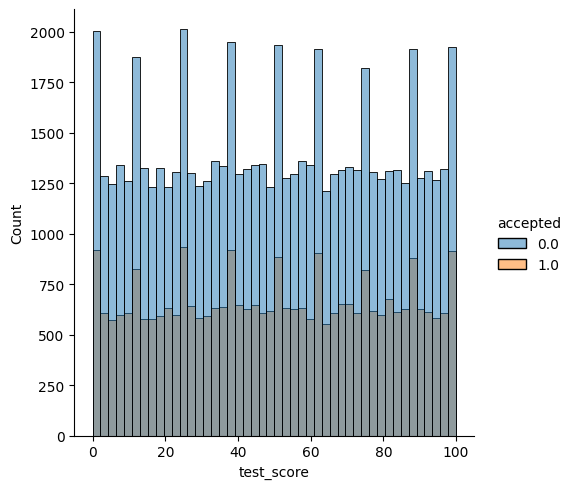

In [13]:
sns.displot(data=train, x='test_score', hue='accepted')

In [14]:
train[train['application_id'].isin(test['application_id'])]

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
397,20,Украина,Львов,14,0,6709935,bc9aafd289de250b9fd6f19c94ab077c,2.0,8667dfa857195bb531b9a6516a618ff6,0.0
845,19,Украина,Львов,8,0,6142223,185ff2a5e1230ddb0434975524432a6c,17.0,093184d004a145a76e96cf50339f4d99,0.0
1427,17,Украина,Запорожье,12,0,5998016,f1eef626c29a481a5527d242ae5516a8,95.0,7d77a911b487634b8682d88f0be3142d,0.0
1501,17,Беларусь,Гродно,17,0,7460045,e7d4f790b86d0b8f1e80a3f181e7add2,6.0,88dfd15dbce55742e4cd3b8649515139,1.0
2454,17,Казахстан,Павлодар,15,0,3215557,56b4da4b9f916a54be39f26757c8ce14,91.0,a1b18f5a58e1d219b932700d5e06f07f,0.0
...,...,...,...,...,...,...,...,...,...,...
93623,18,Беларусь,Брест,4,5,1263971,b0f371fa4e704cac2af1c0bbdfa11940,95.0,b33fa1b9160151a54f1189dcac464bcf,1.0
94135,19,Казахстан,Актобе,19,5,1972235,bbb9cb64477f9429b7985d92b8c6d9d7,95.0,a29b2480c10f3f282b0ea0c6a844e45a,1.0
94296,20,Украина,Львов,16,5,2152028,a2b7795cd58502654754ce03163a1685,99.0,e80845bdcf91ce2bc26a7adcbf216401,1.0
94377,23,Украина,Одесса,14,5,5034613,dadaef222d17af71e34a4d39f182d7ae,56.0,4706cb7b685d43f4b38e5b1527cf964f,1.0


In [15]:
test[test['application_id'].isin(train['application_id'])]

,ID,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id
57,96057,17,Украина,Харьков,18,0,3091135,bfbca9e6c1e7d0b3e670af72336b6e60,88.00,01c612c8863df80a8c80e721eadd7db5
75,96075,18,Россия,Краснодар,7,0,4120608,7ebd9ffcf2f9f0fbe6cfd54917af2098,26.00,795969b204ac61f1569bf8874f4e09e7
333,96333,25,Украина,Киев,5,0,2861141,e95acb9dd96d64d501a2aabc1c77f2be,54.63,68226c6dfdf667585e763cb50583665e
407,96407,19,Казахстан,Алматы,18,0,7460045,cf078e3887db4cd22541f16f8f928444,53.00,88dfd15dbce55742e4cd3b8649515139
731,96731,20,Беларусь,Брест,16,0,1849219,999de5aeac0e15044bd2b893f331dd61,37.00,c5048afed0d2194d84c99a1b0a465cb9
...,...,...,...,...,...,...,...,...,...,...
23066,119066,25,Украина,Харьков,6,5,4408536,664452c22006a9ed7cdf2f74f68f078d,13.00,067f3cbde508abe39bf8b2236c23a2e7
23401,119401,20,Казахстан,Караганда,14,5,4231137,c1e7e9f8a21747d873358b3a8a5a14e7,50.00,b3cd6d4dabe8da73023b578028b2e469
23687,119687,23,Беларусь,Минск,4,5,5647218,1c49df9618d0ff1037c90c1f4f6afc0e,73.00,e24646fabe6f4d53242d76230bbba73e
23692,119692,25,Казахстан,Шымкент,4,5,3529737,018b629d5bb1e0a83ccbbbf278e6a3bb,31.00,c8ea632a88ddfd1da638a998eacd0d14


### Мало пересечений, но есть

### Оставим все фичи

# Золотые фичи

### Лик по student id

In [16]:
grs = train.groupby('student_id', as_index=False).agg({'sociodemographics': list, 'accepted': 'mean'})
lst = grs[grs['sociodemographics'].apply(len) > 1]['student_id'].tolist()
new_train = train[train['student_id'].isin(lst)].sort_values('student_id')
new_train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted
63773,17,Россия,Уфа,20,3,1000643,a2e56b1228f7a0ed258b802f5d7c783d,70.0,2ccf4595a1cb0c5ad44b55ec952ead1d,1.0
7943,17,Россия,Уфа,20,0,1000643,a2e56b1228f7a0ed258b802f5d7c783d,70.0,2ccf4595a1cb0c5ad44b55ec952ead1d,0.0
47664,24,Беларусь,Витебск,13,2,1001203,639879d0115e8075d21a7619d63c41ee,4.0,9349b539452be4d10d652f4bad47f371,0.0
54528,24,Беларусь,Витебск,13,3,1001203,639879d0115e8075d21a7619d63c41ee,4.0,9349b539452be4d10d652f4bad47f371,1.0
30698,20,Беларусь,Витебск,11,1,1001289,999de5aeac0e15044bd2b893f331dd61,13.0,8d8e32d2861c185e4ccf83cf70a80a63,1.0
...,...,...,...,...,...,...,...,...,...,...
58303,19,Беларусь,Могилёв,18,3,9998116,ff43c402b75de2419d4bdf4b96ea6c40,11.0,4fbd58a9c7915df4aa1a751d18f316c9,0.0
7321,17,Россия,Нижний Новгород,8,0,9998593,a2e56b1228f7a0ed258b802f5d7c783d,98.0,6c29378e2c7777f10efb19b3294d7146,0.0
46986,17,Россия,Нижний Новгород,8,2,9998593,a2e56b1228f7a0ed258b802f5d7c783d,98.0,6c29378e2c7777f10efb19b3294d7146,1.0
25955,24,Казахстан,Караганда,18,1,9998763,ba49cda1b2e36ff04c1430ef410f1c23,51.0,37961b831897757ff53c3c3a272ed71e,1.0


In [17]:
train['dupl'] = train['student_id'].isin(lst).astype(int)
train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted,dupl
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0,1
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0,0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0,0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0,0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0,1
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0,1
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0,1
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0,1


In [18]:
pt = train['dupl'].to_numpy().reshape((96, 1000)).mean(axis=1)

<Axes: >

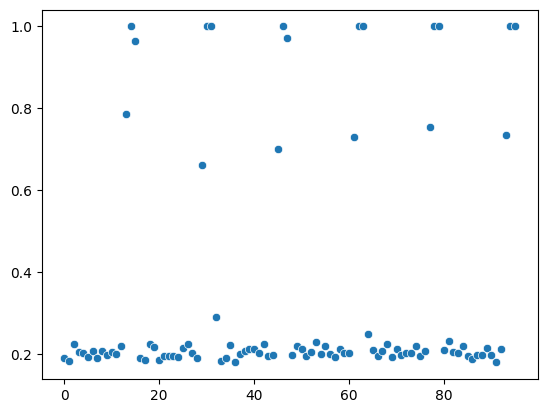

In [19]:
sns.scatterplot(x=range(len(pt)), y=pt)

In [20]:
train['accepted'].value_counts()

accepted
0.0    65281
1.0    30719
Name: count, dtype: int64

In [21]:
grs_test = test.groupby('student_id', as_index=False).agg({'faculty': list})

In [22]:
lst_test = grs_test[grs_test['faculty'].apply(len) > 1]['student_id'].tolist()

<Axes: >

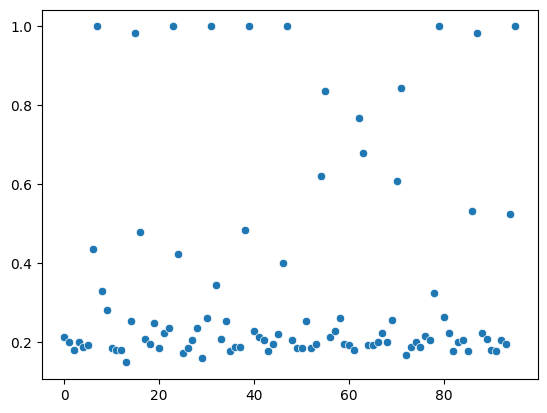

In [23]:
test['dupl'] = test['student_id'].isin(lst_test).astype(int)
pt1 = test['dupl'].to_numpy().reshape((96, 24000 // 96)).mean(axis=1)
sns.scatterplot(x=range(len(pt1)), y=pt1)

In [24]:
new_test = test[test['student_id'].isin(lst_test)]#.sort_values('student_id')

In [25]:
train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted,dupl
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0,1
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0,0
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0,0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0,0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0,1
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0,1
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0,1
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0,1


### Лик с разделением на бачи датасета

<Axes: >

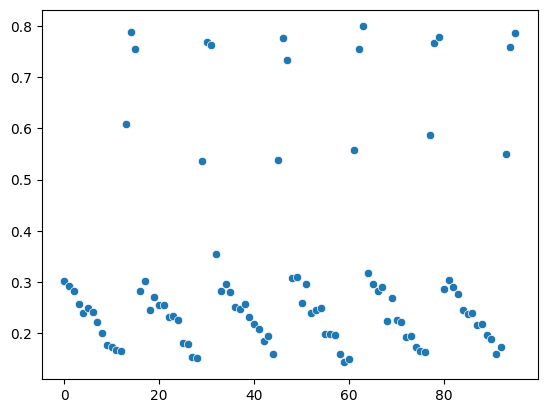

In [26]:
kt = train['accepted'].to_numpy().reshape((96, 1000)).mean(axis=1)
sns.scatterplot(x=range(len(kt)), y=kt)

### faculty показывает будто test - двойные закономерности train

<Axes: ylabel='faculty'>

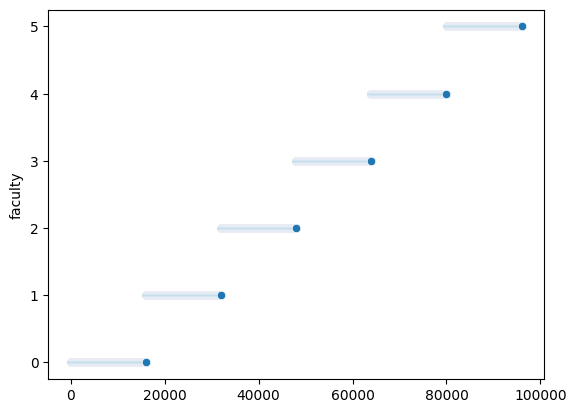

In [27]:
sns.scatterplot(x=range(len(train)), y=train['faculty'])

<Axes: ylabel='faculty'>

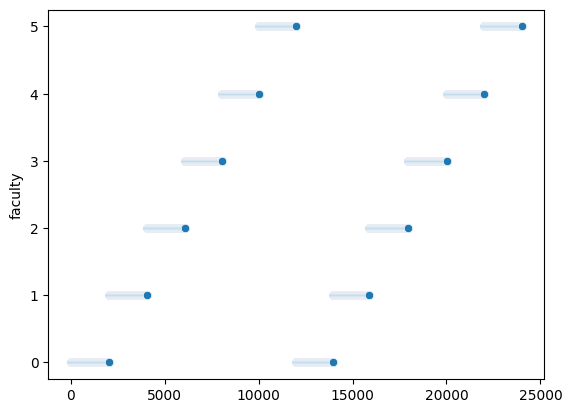

In [28]:
sns.scatterplot(x=range(len(test)), y=test['faculty'])

### Тогда наложим средние скоры бачей на тест, как будто это вероятности

In [29]:
r = len(test) // 2
lst = []
for p in kt:
    for i in range(r // 96):
        lst.append(p)
ans = lst + lst

### Здесь опять же идёт некоторое допущение, где я просто заполняю подряд идущие сэмплы одной и той же вероятностью, но чтобы в среднем она соответствовала зависимости в train

<Axes: >

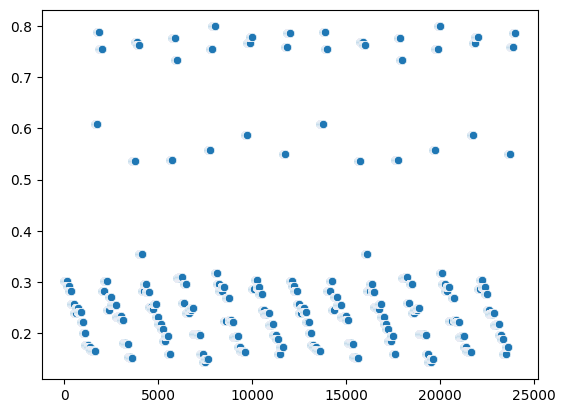

In [30]:
sns.scatterplot(x=range(len(ans)), y=ans)

In [31]:
len(ans)

24000

In [32]:
gold_test = test.copy()

In [33]:
gold_test['accepted'] = ans

In [34]:
gold_test[['ID', 'accepted']].to_csv(r'gold_answer.csv', index=False)

## Лик с sociodemographics

### Получается для каждого возраста и страны есть 2 метки sociodemographics, причём у них различается средний acceptance, тогда сделаем это бинарной фичей

In [35]:
grs = train.groupby(['country', 'age', 'sociodemographics'], as_index=False).agg({'accepted': 'mean'}).sort_values(['country', 'age', 'accepted'])
len(grs['sociodemographics'].drop_duplicates()) == len(grs)

True

In [36]:
grs['new_col'] = [0, 1] * (len(grs) // 2)

In [37]:
dct = {grs['sociodemographics'][i]: grs['new_col'][i] for i in range(len(grs))}

In [38]:
dct

{'c619abe4f81881b4d4556094b7c7b640': 0,
 'e7d4f790b86d0b8f1e80a3f181e7add2': 1,
 '5e8668a555b3c4cf31b5e59ccbf7dc4e': 0,
 'b0f371fa4e704cac2af1c0bbdfa11940': 1,
 'a80f6cf47e6a99a904fd5d1853e5b16b': 0,
 'ff43c402b75de2419d4bdf4b96ea6c40': 1,
 '999de5aeac0e15044bd2b893f331dd61': 0,
 'aa3299835464e148e6a1a42d2add53b7': 1,
 'caf77419cb9dcedac5b8f36b58e3c572': 1,
 'fe8ad6510dffe532ea8fe0cf854f1427': 0,
 '645bb2777c1e5ff1d1ad5ef2112bcf3b': 0,
 '7838ac113164a62a0eef5262d7a15873': 1,
 '1c49df9618d0ff1037c90c1f4f6afc0e': 0,
 '9dd02374faf34265f9bf0f6410a3cbcd': 1,
 '20f533cfdc12970d061eae62e09deb73': 1,
 '639879d0115e8075d21a7619d63c41ee': 0,
 '1ce8f0f5d51b4aff1ee813b131ee7c88': 1,
 'ac3b3ff291a03544c1dba82b89ce771e': 0,
 '37f60294353c5b301f43b25fa0de5ec6': 1,
 '56b4da4b9f916a54be39f26757c8ce14': 0,
 'ce33a4a84820e71f4f0b507d574c4146': 0,
 'de6753fb488b87117296d8bef2edc7b3': 1,
 'bbb9cb64477f9429b7985d92b8c6d9d7': 0,
 'cf078e3887db4cd22541f16f8f928444': 1,
 '4770b72d5089a17da7bd0c67a41d4e32': 1,


In [39]:
train['soc_new_col'] = train['sociodemographics'].map(dct)

In [40]:
test['soc_new_col'] = test['sociodemographics'].map(dct)

In [41]:
train

,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,accepted,dupl,soc_new_col
0,24,Россия,Санкт-Петербург,9,0,7127004,1f63c614a798186e5b5dbca02201a070,21.0,06c4288fba116e49f49d82a16184fca6,0.0,1,0
1,21,Казахстан,Астана,5,0,6264436,99fec0c12216abee9eec3bee2138754f,29.0,45273a0d372f7f2747afc98bdc63c31a,1.0,0,1
2,17,Россия,Тула,3,0,9056805,f733e24fc7ae975aab7c3e092b1ae96c,89.0,773c820049150b6854691b5e7fdcd63f,0.0,0,0
3,20,Украина,Киев,1,0,8857612,a2b7795cd58502654754ce03163a1685,2.0,d07f757f1b51f8b9189a84298b142794,0.0,0,0
4,19,Россия,Пермь,8,0,6422527,90519fbbfd457329160e9c1767cb0a86,23.0,269f19b2ef9f46af5012931bfd4acf22,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95995,21,Россия,Улан-Удэ,5,5,2019496,e065aa14d0861cb2e8c227049bc0b1d3,73.0,4c33d89befc11bea800221a9d8719549,1.0,1,0
95996,18,Казахстан,Шымкент,9,5,1202270,de6753fb488b87117296d8bef2edc7b3,91.0,b76e187984d8b80264b4c97fac124f84,0.0,1,1
95997,18,Россия,Владивосток,14,5,4114792,7ebd9ffcf2f9f0fbe6cfd54917af2098,31.0,750e34ebbf17be247c9184149109cbdd,1.0,1,1
95998,20,Украина,Запорожье,2,5,5024696,a2b7795cd58502654754ce03163a1685,45.0,0a17ffcb17a2ffd2eb185ac793ed444e,1.0,1,0


In [42]:
test

,ID,age,country,city,school,faculty,student_id,sociodemographics,test_score,application_id,dupl,soc_new_col
0,96000,21,Россия,Санкт-Петербург,9,0,4428545,adcb62fdc1121af780dc4138486cc7e3,63.0,700db6161a195963a89ee91a11bc6449,0,1
1,96001,22,Казахстан,Астана,5,0,4828171,05ec3873d1ced60fb3d4327bfd368e00,62.0,c818a649e468d97325813b877fb7f308,1,1
2,96002,23,Россия,Тула,3,0,6305415,1533b17f2c49fec036550ee67955b0a6,17.0,0cc80bc0aa8531794601980c4c2f0fb7,0,0
3,96003,17,Украина,Киев,1,0,5175385,f1eef626c29a481a5527d242ae5516a8,25.0,ed05d43a670eea5a75662cc82d3a4b7d,1,0
4,96004,24,Россия,Пермь,8,0,1809466,67086df93882a3958b6163a60d0bd6b5,64.0,7b3e7852822d85f1de686caeb0c6307d,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,119995,24,Украина,Запорожье,9,5,4222406,c35fb088b2e889aeb1f99fc9d21292a5,38.0,566ef31470ee65f6f9ab087dedee4f62,1,1
23996,119996,17,Украина,Запорожье,12,5,4382550,bfbca9e6c1e7d0b3e670af72336b6e60,90.0,0f67dbe83cb72c6b8b3bbb89c9cc6d02,1,1
23997,119997,17,Казахстан,Алматы,2,5,2780558,56b4da4b9f916a54be39f26757c8ce14,78.0,e8e86ee3af0ba2f4408c08a8f431b284,1,0
23998,119998,18,Казахстан,Астана,5,5,1773219,ce33a4a84820e71f4f0b507d574c4146,90.0,444d9437a6e57a722715af2feab9ce82,1,0


### Едем дальше

### Пора обучать

In [43]:
cat_feat = ['student_id', 'application_id', 'sociodemographics', 'country', 'city'] 

In [44]:
cb = CatBoostClassifier(random_seed=42, cat_features=cat_feat)

In [45]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['accepted'])
y = train['accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41, stratify=y)

In [46]:
cb.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.089592
0:	learn: 0.6701093	test: 0.6701328	best: 0.6701328 (0)	total: 202ms	remaining: 3m 22s
1:	learn: 0.6519907	test: 0.6523968	best: 0.6523968 (1)	total: 270ms	remaining: 2m 14s
2:	learn: 0.6369751	test: 0.6373705	best: 0.6373705 (2)	total: 318ms	remaining: 1m 45s
3:	learn: 0.6249719	test: 0.6253945	best: 0.6253945 (3)	total: 391ms	remaining: 1m 37s
4:	learn: 0.6156228	test: 0.6160623	best: 0.6160623 (4)	total: 444ms	remaining: 1m 28s
5:	learn: 0.5824078	test: 0.5577188	best: 0.5577188 (5)	total: 514ms	remaining: 1m 25s
6:	learn: 0.5590343	test: 0.5174686	best: 0.5174686 (6)	total: 613ms	remaining: 1m 26s
7:	learn: 0.5424280	test: 0.4896938	best: 0.4896938 (7)	total: 663ms	remaining: 1m 22s
8:	learn: 0.5306663	test: 0.4706224	best: 0.4706224 (8)	total: 723ms	remaining: 1m 19s
9:	learn: 0.5232156	test: 0.4584185	best: 0.4584185 (9)	total: 758ms	remaining: 1m 15s
10:	learn: 0.5181774	test: 0.4512749	best: 0.4512749 (10)	total: 797ms	remaining: 1m 11s
11:	learn: 

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [48]:
print(accuracy_score(y_test, cb.predict(X_test)))
print(precision_score(y_test, cb.predict(X_test)))
print(recall_score(y_test, cb.predict(X_test)))
print(f1_score(y_test, cb.predict(X_test)))
print(roc_auc_score(y_test, cb.predict_proba(X_test)[:, 1]))

0.8066666666666666
0.8725490196078431
0.4635416666666667
0.6054421768707483
0.85028108861365


In [49]:
#0.85028108861365

In [50]:
pred_new = cb.predict_proba(test.drop(columns=['ID']))[:, 1]

In [51]:
imps = pd.DataFrame()
imps['cols'] = X_train.columns
imps['imps'] = cb.feature_importances_

In [52]:
imps

,cols,imps
0,age,1.270407
1,country,0.765678
2,city,5.066154
3,school,1.800121
4,faculty,1.081568
5,student_id,0.401429
6,sociodemographics,3.373316
7,test_score,10.375634
8,application_id,66.878376
9,dupl,6.915562


In [53]:
pred_new

array([0.37728922, 0.47041708, 0.19176275, ..., 0.43091317, 0.45562808,
       0.49681593])

In [54]:
test['accepted'] = pred_new

In [55]:
test[['ID', 'accepted']].to_csv(r'cb_answer.csv', index=False)

### Блендинг

In [56]:
test['accepted'] = (gold_test['accepted'] + test['accepted']) / 2

In [57]:
test[['ID', 'accepted']].to_csv(r'submission.csv', index=False)